In [ ]:
#Luis_Test3_Parameters_1199k_Acc_9910_Epoch_12

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 12
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.25

Using TensorFlow backend.


In [11]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

X_train.shape

60000 train samples
10000 test samples


(60000, 28, 28, 1)

In [12]:
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(NB_CLASSES, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [16]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0257 - acc: 0.9922 - val_loss: 0.0427 - val_acc: 0.9886
Epoch 2/12
48000/48000 [==============================] - 86s 2ms/step - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0400 - val_acc: 0.9897
Epoch 3/12
48000/48000 [==============================] - 83s 2ms/step - loss: 0.0225 - acc: 0.9929 - val_loss: 0.0350 - val_acc: 0.9903
Epoch 4/12
48000/48000 [==============================] - 83s 2ms/step - loss: 0.0219 - acc: 0.9928 - val_loss: 0.0404 - val_acc: 0.9907
Epoch 5/12
48000/48000 [==============================] - 80s 2ms/step - loss: 0.0215 - acc: 0.9932 - val_loss: 0.0383 - val_acc: 0.9900
Epoch 6/12
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0352 - val_acc: 0.9910
Epoch 7/12
48000/48000 [==============================] - 97s 2ms/step - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0356 - val_acc

In [17]:
print("\nTest score:", score[0])
print('Test accuracy:', score[1])
print("\n")
# list all data in history
print(history.history.keys())


Test score: 0.02826622737799762
Test accuracy: 0.9908


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


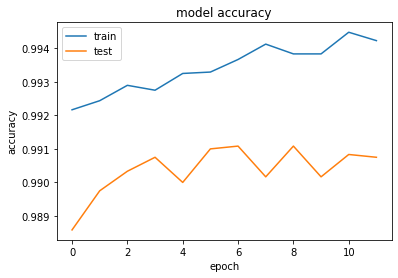

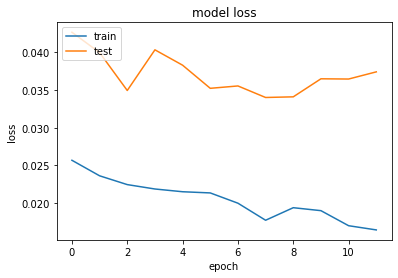

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()